In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/google_data/google-stock-dataset-Daily.csv")
df.head()

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
High          0
Low           0
Close         0
Volume        0
Adj Close     0
dtype: int64

In [ ]:
df.shape

(2510, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2510 non-null   int64  
 1   Date        2510 non-null   object 
 2   Price       2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   Close       2510 non-null   float64
 6   Volume      2510 non-null   int64  
 7   Adj Close   2510 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.0+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.nunique()

Unnamed: 0    2510
Date          2510
Price         2081
High          2064
Low           2066
Close         2058
Volume        2414
Adj Close     2058
dtype: int64

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

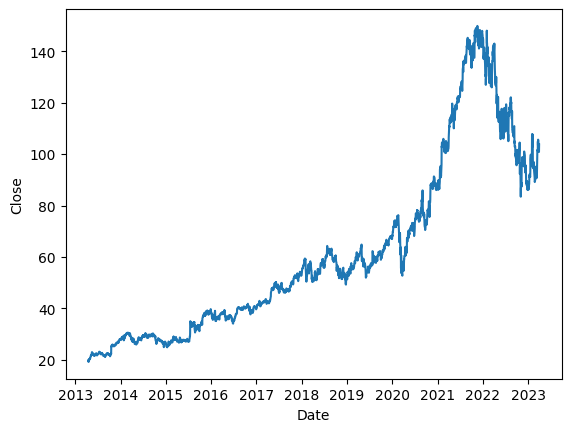

In [ ]:
import seaborn as sns
sns.lineplot(x="Date", y="Close",data=df)
  
plt.show()

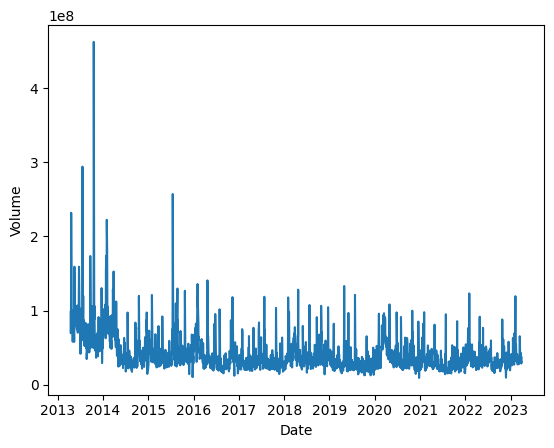

In [ ]:
sns.lineplot(x="Date", y="Volume",data=df)
  
plt.show()

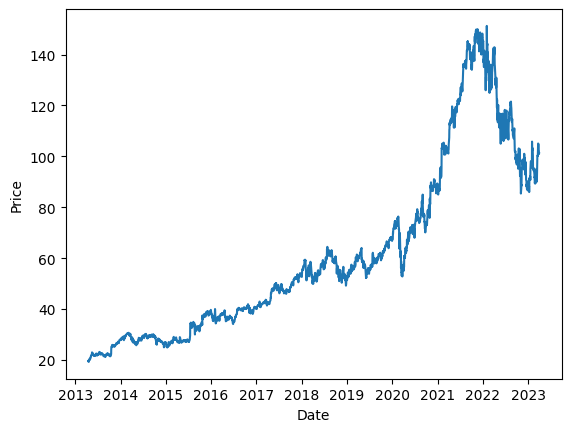

In [ ]:
sns.lineplot(x="Date", y="Price",data=df)
  
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(x):
  res = adfuller(x)
  labels = ['ADF test Statistic', 'p-value','#lags Used','Numer of Observation used']
  for val,lab in zip(res,labels):
    print(lab+":"+str(val))
  if res[1] <= 0.05:
    print("strong envidence against h0")
  else:
    print("weak evidence against h0")

In [ ]:
adf_test(df['Close'])

ADF test Statistic:-0.6868680967233374
p-value:0.8501217380619667
#lags Used:23
Numer of Observation used:2486
weak evidence against h0


In [ ]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)


In [ ]:
adf_test(df['Close_diff'].dropna())

ADF test Statistic:-11.953102792506309
p-value:4.271194331546914e-22
#lags Used:22
Numer of Observation used:2486
strong envidence against h0


**ARIMA MODEL**

<Axes: >

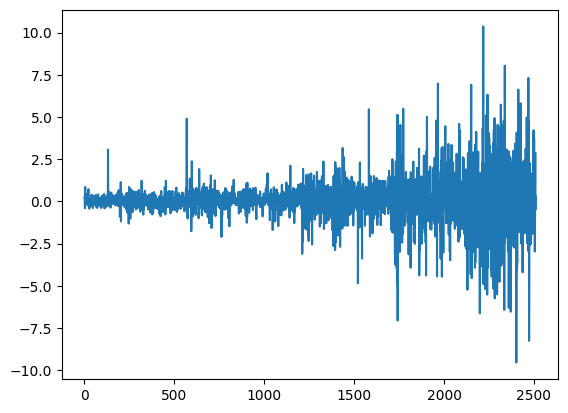

In [ ]:
df['Close_diff'].plot()

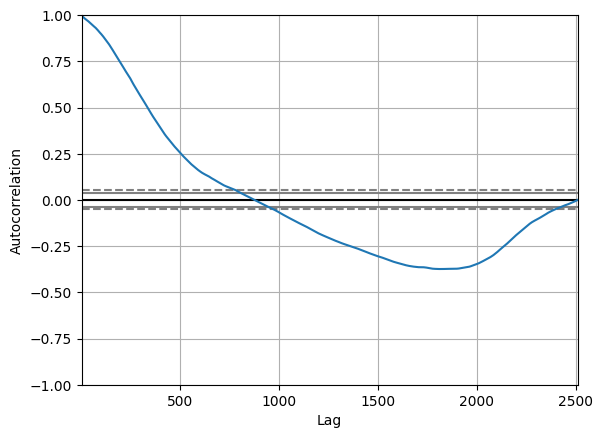

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

In [ ]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


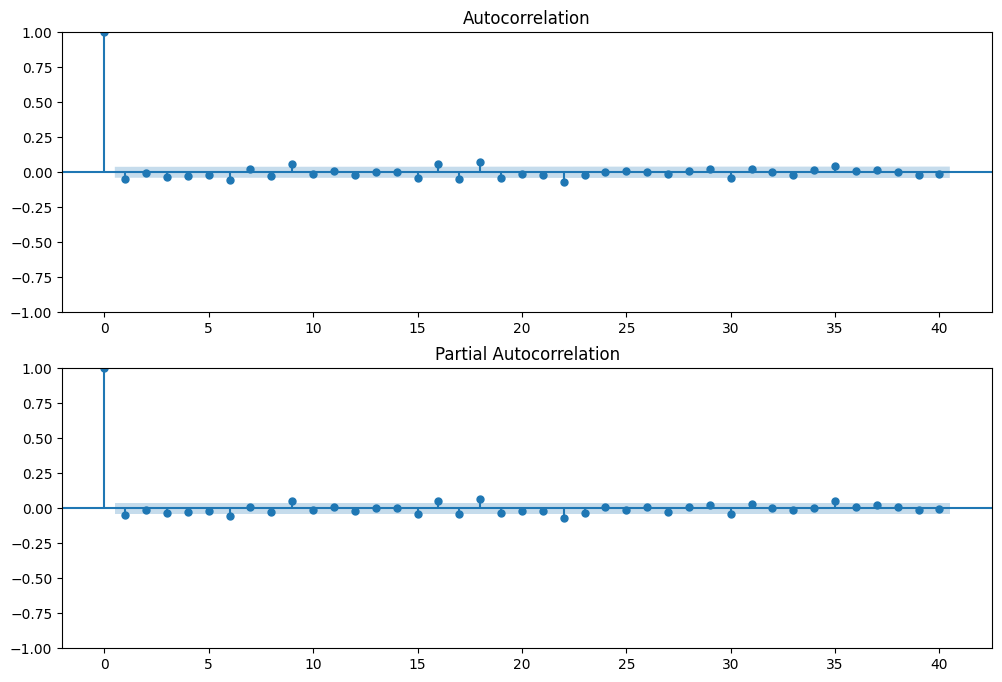

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close_diff'].dropna(),lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close_diff'].dropna(),lags = 40,ax = ax2)

In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.5 MB/s eta 0:00:00


In [ ]:
step_fit = auto_arima(list(df["Close"]),trace=True,suppress_warnings=True)
print(step_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8573.108, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8579.307, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.664, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.533, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8578.887, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.858, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8576.256, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8570.354, Time=2.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.755, Time=5.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8576.457, Time=1.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8570.759, Time=1.36 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 16.953 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(list(df["Close"]), order=(1,1,1))


In [ ]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2510
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4282.379
Date:                Thu, 20 Apr 2023   AIC                           8570.759
Time:                        05:41:46   BIC                           8588.242
Sample:                             0   HQIC                          8577.105
                               - 2510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7527      0.065     11.515      0.000       0.625       0.881
ma.L1         -0.7985      0.060    -13.290      0.000      -0.916      -0.681
sigma2         1.7784      0.022     81.098      0.000       1.735       1.821
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              7589.75
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              21.37   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

pred = model.predict(start=2410,end =2509)
pred


array([ 86.82532395,  88.59836445,  88.96774229,  87.44650493,
        93.73762684,  96.13519988,  95.51310252,  98.16518373,
        98.61176058,  98.19221488,  97.3386398 ,  95.61091402,
        96.99226241,  98.34927515,  97.41741227,  96.08061197,
        95.25385797, 100.77518149, 100.81846075, 100.3282268 ,
        99.43474195,  97.05843378,  95.09612399,  93.89104014,
        93.01489613,  93.43564714,  95.62400871,  95.09088029,
        91.06961575,  90.45488238,  88.67902932,  89.18429123,
        89.68552713,  87.92767638,  89.29652543,  87.5274489 ,
        86.19254363,  88.47641577,  88.2611763 ,  89.10410699,
        88.11497162,  86.31408538,  87.37885509,  88.01986294,
        88.40155875,  91.36320265,  91.02266595,  91.98891922,
        91.22336641,  91.07458202,  92.9252814 ,  97.69263572,
        99.44747125,  97.5222638 ,  95.19172928,  97.39201711,
        99.18301711,  96.90205404,  98.72262292, 100.26340186,
       107.27195258, 104.54190491, 102.79603313, 107.33

In [ ]:
s = pd.Series(pred, index =df.index[-100:])
s

2410     86.825324
2411     88.598364
2412     88.967742
2413     87.446505
2414     93.737627
           ...    
2505    105.229420
2506    102.428418
2507    101.070317
2508    101.405695
2509    100.925448
Length: 100, dtype: float64

<Axes: >

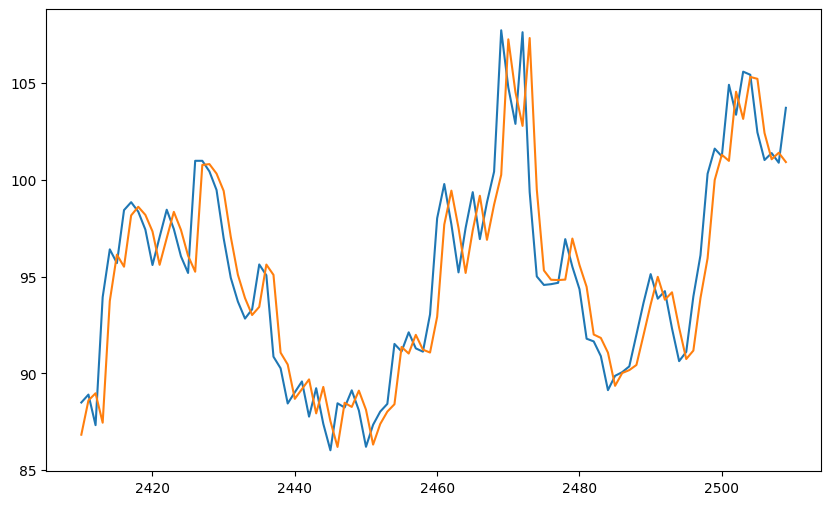

In [ ]:
plt.figure(figsize=(10,6))
df['Close'][-100:].plot()
s.plot()

!pip install prophet


In [ ]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
df2 = df[['Date','Close']].copy()
df2.rename(columns = {'Date':'ds', 'Close':'y'}, inplace = True)

# define the model
p_model = Prophet()
# fit the model
p_model.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplc2jm6uq/my4o_d4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplc2jm6uq/be2a5bc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17211', 'data', 'file=/tmp/tmplc2jm6uq/my4o_d4b.json', 'init=/tmp/tmplc2jm6uq/be2a5bc7.json', 'output', 'file=/tmp/tmplc2jm6uq/prophet_modelis5n4m2b/prophet_model-20230420060736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predl = []
for i in range(1, 30):
  date = '2020-04-%02d' % i
  predl.append([date])
predl = pd.DataFrame(predl)
predl.columns = ['ds']
predl['ds']= pd.to_datetime(predl['ds'])
# use the model to make a forecast
forecast = p_model.predict(predl)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-01,66.864524,57.224091,74.975107,66.864524,66.864524,-0.824041,-0.824041,-0.824041,0.487490,0.487490,0.487490,-1.311531,-1.311531,-1.311531,0.0,0.0,0.0,66.040483
1,2020-04-02,66.893787,56.703204,75.407705,66.893787,66.893787,-0.839666,-0.839666,-0.839666,0.504836,0.504836,0.504836,-1.344502,-1.344502,-1.344502,0.0,0.0,0.0,66.054121
2,2020-04-03,66.923049,56.633946,75.422306,66.923049,66.923049,-0.927654,-0.927654,-0.927654,0.451065,0.451065,0.451065,-1.378719,-1.378719,-1.378719,0.0,0.0,0.0,65.995395
3,2020-04-04,66.952311,55.633234,73.684511,66.952311,66.952311,-2.565226,-2.565226,-2.565226,-1.151801,-1.151801,-1.151801,-1.413425,-1.413425,-1.413425,0.0,0.0,0.0,64.387085
4,2020-04-05,66.981573,54.944567,73.146295,66.981573,66.981573,-2.599717,-2.599717,-2.599717,-1.151802,-1.151802,-1.151802,-1.447915,-1.447915,-1.447915,0.0,0.0,0.0,64.381857
5,2020-04-06,67.010836,57.127247,75.554582,67.010836,67.010836,-1.030651,-1.030651,-1.030651,0.450910,0.450910,0.450910,-1.481560,-1.481560,-1.481560,0.0,0.0,0.0,65.980185
6,2020-04-07,67.040098,57.060434,75.006643,67.040098,67.040098,-1.104518,-1.104518,-1.104518,0.409301,0.409301,0.409301,-1.513819,-1.513819,-1.513819,0.0,0.0,0.0,65.935580
7,2020-04-08,67.069360,56.659166,75.108957,67.069360,67.069360,-1.056763,-1.056763,-1.056763,0.487490,0.487490,0.487490,-1.544253,-1.544253,-1.544253,0.0,0.0,0.0,66.012597
8,2020-04-09,67.098623,56.884863,75.244183,67.098623,67.098623,-1.067704,-1.067704,-1.067704,0.504836,0.504836,0.504836,-1.572540,-1.572540,-1.572540,0.0,0.0,0.0,66.030919
9,2020-04-10,67.127885,56.938106,75.386274,67.127885,67.127885,-1.147409,-1.147409,-1.147409,0.451065,0.451065,0.451065,-1.598474,-1.598474,-1.598474,0.0,0.0,0.0,65.980476


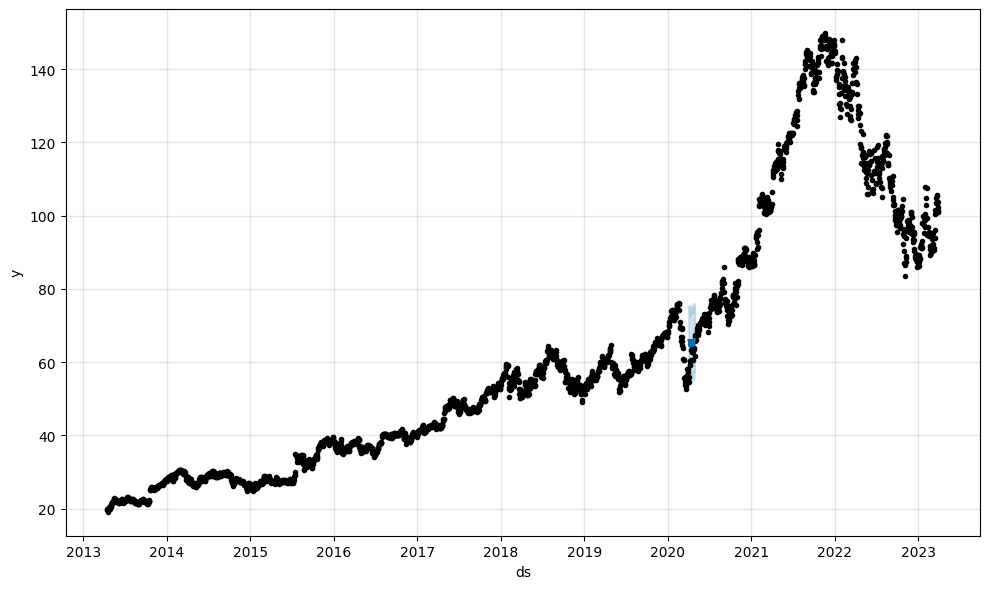

In [ ]:
p_model.plot(forecast)
plt.show()